In [128]:
# ove godine nije radjeno stablo odlucivanja, pa klasifikaciju radim neuronskom mrezom

import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn import model_selection
from matplotlib import pyplot as plt

In [129]:
df = pd.read_csv('glass.csv')
df.describe()

,id,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [130]:
X = df.drop(['glass_type'], axis=1)
y = df[['glass_type']]

classes = set()
for v in df.glass_type:
    classes.add(v)

print(classes)

{1, 2, 3, 5, 6, 7}


In [131]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 10)
(160, 1)
(54, 10)
(54, 1)


In [132]:
X_train_normalied = X_train / X_train.max()
X_test_normalied = X_test / X_test.max()

y_train_categorical = keras.utils.to_categorical(y_train, 8)
y_test_categorical = keras.utils.to_categorical(y_test, 8)

In [133]:
model = keras.models.Sequential()
#model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(32, activation='relu') )
model.add( keras.layers.Dense(8, activation='softmax') )

In [134]:
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [135]:
history = model.fit(X_train_normalied, y_train_categorical, epochs=100, batch_size=32
                    , validation_data=(X_test_normalied, y_test_categorical))

Epoch 1/100
5/5 [==============================] - 0s 28ms/step - loss: 2.1147 - accuracy: 0.3000 - val_loss: 2.0077 - val_accuracy: 0.4444
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 2.0594 - accuracy: 0.3250 - val_loss: 1.9530 - val_accuracy: 0.4444
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 2.0084 - accuracy: 0.3250 - val_loss: 1.8999 - val_accuracy: 0.4444
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9622 - accuracy: 0.3250 - val_loss: 1.8487 - val_accuracy: 0.4444
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 1.9160 - accuracy: 0.3250 - val_loss: 1.8024 - val_accuracy: 0.4444
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 1.8722 - accuracy: 0.3250 - val_loss: 1.7576 - val_accuracy: 0.4444
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.8296 - accuracy: 0.3250 - val_loss: 1.7159 - val_accuracy: 0.4444
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.7063 - val_loss: 1.0241 - val_accuracy: 0.6481
Epoch 60/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0240 - accuracy: 0.7063 - val_loss: 1.0175 - val_accuracy: 0.6481
Epoch 61/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0166 - accuracy: 0.7063 - val_loss: 1.0123 - val_accuracy: 0.6481
Epoch 62/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0094 - accuracy: 0.7063 - val_loss: 1.0055 - val_accuracy: 0.6481
Epoch 63/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0022 - accuracy: 0.7063 - val_loss: 1.0008 - val_accuracy: 0.6852
Epoch 64/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9955 - accuracy: 0.6938 - val_loss: 0.9956 - val_accuracy: 0.6852
Epoch 65/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9885 - accuracy: 0.7000 - val_loss: 0.9880 - val_accuracy: 0.6852
Epoch 66/100
5/5 [===============

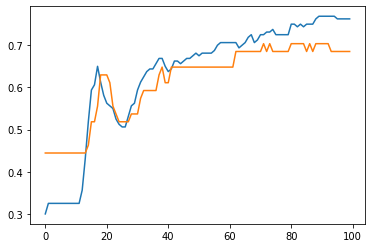

In [136]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.show()